In [ ]:
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt
import re
import nltk
import string
from tensorflow.keras.preprocessing.text import Tokenizer
from tensorflow.keras.preprocessing.sequence import skipgrams

In [ ]:
url = 'https://raw.githubusercontent.com/Factha-Bangkit-Capstone/machine-learning-factha/main/balanced_dataset.csv'

dataset = pd.read_csv(url)
dataset.head()

,berita,tagging
0,Pemkot Surabaya terus merazia permen dot yang ...,Hoax
1,Malam peringatan ulang tahun ke-90 Kolese Kani...,Hoax
2,Mungkin Anda pernah membaca artikel atau sekad...,Valid
3,Konsulat Jenderal Republik Indonesia di Davao ...,Valid
4,"Akhir-akhir ini, beredar pemberitaan yang meny...",Valid


In [ ]:
dataset.tail()

,berita,tagging
925,Detasemen Khusus (Densus) 88 Anti Teror Mabes ...,Valid
926,Beredar foto peserta Aksi 212 Jilid Dua di med...,Valid
927,"""KANKER BUKAN PENYAKIT, TETAPI BISNIS MILIARAN...",Hoax
928,B737 MAX 8 Lion Air dengan registrasi PK-AXC i...,Valid
929,VIVA Lima Pengawas Pemilihan Umum Kelurahan/D...,Valid


In [ ]:
dataset.shape

(930, 2)

In [ ]:
dataset.columns

Index(['berita', 'tagging'], dtype='object')

In [ ]:
df_data = dataset.copy()
df_data['tagging'].value_counts()

tagging
Hoax     465
Valid    465
Name: count, dtype: int64

In [ ]:
df_data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 930 entries, 0 to 929
Data columns (total 2 columns):
 #   Column   Non-Null Count  Dtype 
---  ------   --------------  ----- 
 0   berita   930 non-null    object
 1   tagging  930 non-null    object
dtypes: object(2)
memory usage: 14.7+ KB


<Axes: xlabel='tagging', ylabel='count'>

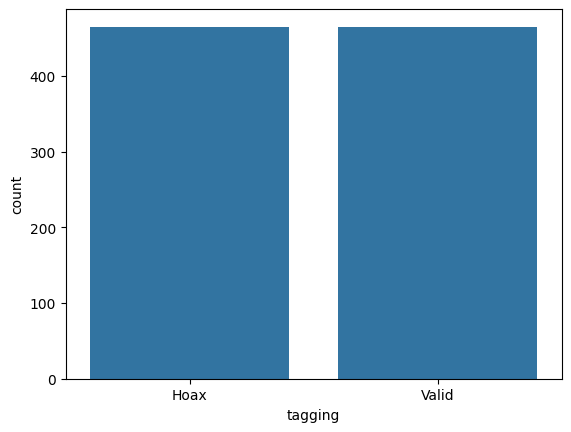

In [ ]:
import seaborn as sns

sns.countplot(data=df_data, x='tagging', order=df_data['tagging'].value_counts().index)

In [ ]:
df_data = df_data.replace({'tagging': {'Valid': '0', 'Hoax': '1'}})
df_data.head()

,berita,tagging
0,Pemkot Surabaya terus merazia permen dot yang ...,1
1,Malam peringatan ulang tahun ke-90 Kolese Kani...,1
2,Mungkin Anda pernah membaca artikel atau sekad...,0
3,Konsulat Jenderal Republik Indonesia di Davao ...,0
4,"Akhir-akhir ini, beredar pemberitaan yang meny...",0


In [ ]:
valid = df_data['tagging'].value_counts()[0]
hoax = df_data['tagging'].value_counts()[1]

print(f'Tagging value counts for valid = {valid}')
print(f'Tagging value counts for hoax = {hoax}')

Tagging value counts for valid = 465
Tagging value counts for hoax = 465


In [ ]:
# Download NLTK wordnet
from nltk.stem import WordNetLemmatizer
nltk.download('wordnet')
lemmatizer = WordNetLemmatizer()

# Define stopwords
stopwords_list = ["yang", "di", "dan", "ini", "dari", "itu", "dengan", "tersebut", "dalam", "untuk", "ada", "pada", "juga", "akan"]

# Function to clean text
def text_clean(text):
    text = ' '.join(re.sub("(@[A-Za-z0-9]+)|([^0-9A-Za-z \t])|(\w+:\/\/\S+)", " ", text).split())
    punkt = set(string.punctuation)
    text = ''.join([ch for ch in text if ch not in punkt])
    text = text.lower()
    text = re.sub('\[.*?\]', '', text)
    text = re.sub("\\W", " ", text)
    text = re.sub('https?://\S+|www\.\S+', '', text)
    text = re.sub('<.*?>+', '', text)
    text = re.sub('[%s]' % re.escape(string.punctuation), '', text)
    text = re.sub('\n', '', text)
    text = re.sub('\w*\d\w*', '', text)
    return text

# Function to remove stopwords
def remove_stopwords(text, stopwords):
    words = text.split()
    filtered_words = [word for word in words if word.lower() not in stopwords]
    return ' '.join(filtered_words)

# Function to lemmatize text
def lemmatize(text):
    return [lemmatizer.lemmatize(word) for word in text.split()]

# Preprocess text function
def preprocess_text(text, stopwords, tokenizer):
    text = text_clean(text)
    text = remove_stopwords(text, stopwords)
    text = ' '.join(lemmatize(text))
    return sequences

# Preprocess dataset
df_data['berita'] = df_data['berita'].apply(text_clean)
df_data['berita'] = df_data['berita'].apply(lambda x: remove_stopwords(x, stopwords_list))
df_data['berita'] = df_data['berita'].apply(lambda x: ' '.join(lemmatize(x)))

# Display the cleaned data
print(df_data.head())

[nltk_data] Downloading package wordnet to /root/nltk_data...


                                              berita tagging
0  pemkot surabaya terus merazia permen dot terin...       1
1  malam peringatan ulang tahun ke kolese kanisiu...       1
2  mungkin anda pernah membaca artikel atau sekad...       0
3  konsulat jenderal republik indonesia davao cit...       0
4  akhir akhir beredar pemberitaan menyatakan ken...       0


In [ ]:
# Tokenization
tokenizer = Tokenizer()
tokenizer.fit_on_texts(df_data['berita'])
sequences = tokenizer.texts_to_sequences(df_data['berita'])

# Display the tokenized data
print("\nSequences:")
for i, seq in enumerate(sequences):
    print(f"Original Text: '{df_data['berita'][i]}'")
    print(f"Converted Sequence: {seq}")


Sequences:
Original Text: 'pemkot surabaya terus merazia permen dot terindikasi mengandung narkoba razia permen berkemasan warna hijau menyasar tiga kecamatan yaitu kecamatan genteng kecamatan rungkut kecamatan sawahan camat sawahan kota surabaya yunus mengatakan razia sudah dilakukan ke tiga sekolah kami razia sdn pakis i sdn pakis ii sdn pakis ix jalan pakistirtosari hasilnya biji permen dot ucap yunus selasa permen dot disinyalir mengandung narkoba secara fisik permen tidak terlihat seperti narkoba melainkan seperti permen biasa permen dijual pkl sekitar sekolah langsung disita kami sita dibawa ke kantor kecamatan ucap yunus petugas merazia makanan minuman sejumlah sd sawahan menemukan sejumlah permen kera permen diduga mengandung formalin berbahaya jika dikonsumsi anak permen kera biji pak permen kera bentuknya tablet kami sita kata yunus'
Converted Sequence: [1457, 203, 372, 3098, 40, 153, 2818, 55, 168, 454, 40, 3750, 1510, 2819, 5030, 264, 373, 318, 373, 4297, 373, 4298, 373, 1

In [ ]:
from sklearn.model_selection import train_test_split
from tensorflow.keras.preprocessing.sequence import pad_sequences

# Pad sequences to ensure equal length
max_len = max(len(seq) for seq in sequences)
X = pad_sequences(sequences, padding='post', maxlen=max_len)

# Ensure y is in integer format
y = df_data['tagging'].astype(int)

# Split data into training and test sets
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.20, random_state=0)

# Display the shapes of the splits
print(f"X_train shape: {X_train.shape}")
print(f"X_test shape: {X_test.shape}")
print(f"y_train shape: {y_train.shape}")
print(f"y_test shape: {y_test.shape}")

X_train shape: (744, 1076)
X_test shape: (186, 1076)
y_train shape: (744,)
y_test shape: (186,)


In [ ]:
import tensorflow as tf

# Jumlah kata unik + 1 untuk zero padding
vocab_size = len(tokenizer.word_index) + 1

lstm_model = tf.keras.models.Sequential([
    tf.keras.layers.Embedding(input_dim=vocab_size, output_dim=128, input_length=max_len),
    tf.keras.layers.Bidirectional(tf.keras.layers.LSTM(units=12)),
    tf.keras.layers.Dropout(rate=0.2),
    tf.keras.layers.Flatten(),
    tf.keras.layers.Dense(units=10, activation='relu'),
    tf.keras.layers.Dense(units=1, activation='sigmoid')
], name='lstm_model')

lstm_model.compile(
    loss = tf.keras.losses.Huber(),
    optimizer = tf.keras.optimizers.RMSprop(learning_rate=0.0001),
    metrics = ['accuracy']
)

lstm_model.summary()

Model: "lstm_model"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 embedding (Embedding)       (None, 1076, 128)         1735296   
                                                                 
 bidirectional (Bidirection  (None, 24)                13536     
 al)                                                             
                                                                 
 dropout (Dropout)           (None, 24)                0         
                                                                 
 flatten (Flatten)           (None, 24)                0         
                                                                 
 dense (Dense)               (None, 10)                250       
                                                                 
 dense_1 (Dense)             (None, 1)                 11        
                                                        

In [ ]:
history = lstm_model.fit(X_train, y_train, epochs=100, validation_data=(X_test, y_test))

Epoch 1/100
24/24 [==============================] - 22s 461ms/step - loss: 0.1248 - accuracy: 0.5175 - val_loss: 0.1248 - val_accuracy: 0.5054
Epoch 2/100
24/24 [==============================] - 7s 307ms/step - loss: 0.1246 - accuracy: 0.5417 - val_loss: 0.1248 - val_accuracy: 0.5054
Epoch 3/100
24/24 [==============================] - 4s 170ms/step - loss: 0.1246 - accuracy: 0.5255 - val_loss: 0.1247 - val_accuracy: 0.5269
Epoch 4/100
24/24 [==============================] - 3s 111ms/step - loss: 0.1244 - accuracy: 0.5363 - val_loss: 0.1246 - val_accuracy: 0.5269
Epoch 5/100
24/24 [==============================] - 4s 148ms/step - loss: 0.1243 - accuracy: 0.5417 - val_loss: 0.1243 - val_accuracy: 0.5645
Epoch 6/100
24/24 [==============================] - 3s 112ms/step - loss: 0.1240 - accuracy: 0.5524 - val_loss: 0.1240 - val_accuracy: 0.5645
Epoch 7/100
24/24 [==============================] - 2s 102ms/step - loss: 0.1235 - accuracy: 0.6169 - val_loss: 0.1235 - val_accuracy: 0.596

In [ ]:
# Evaluate the model
loss, accuracy = lstm_model.evaluate(X_test, y_test)
print(f"Test Accuracy: {accuracy}")

6/6 [==============================] - 0s 46ms/step - loss: 0.0787 - accuracy: 0.8011
Test Accuracy: 0.801075279712677


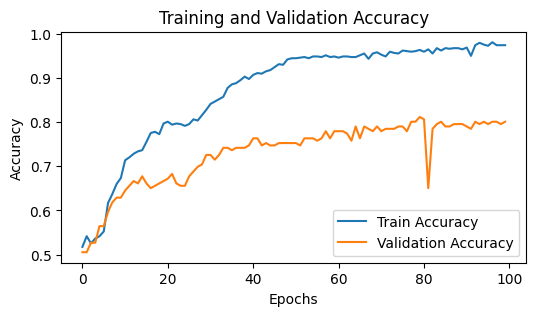

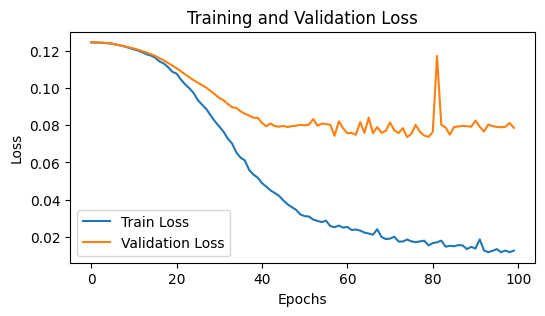

In [ ]:
# Plotting training history
import matplotlib.pyplot as plt

plt.figure(figsize=(6, 3))
plt.plot(history.history['accuracy'], label='Train Accuracy')
plt.plot(history.history['val_accuracy'], label='Validation Accuracy')
plt.xlabel('Epochs')
plt.ylabel('Accuracy')
plt.title('Training and Validation Accuracy')
plt.legend()
plt.show()

plt.figure(figsize=(6, 3))
plt.plot(history.history['loss'], label='Train Loss')
plt.plot(history.history['val_loss'], label='Validation Loss')
plt.xlabel('Epochs')
plt.ylabel('Loss')
plt.title('Training and Validation Loss')
plt.legend()
plt.show()

In [ ]:
# Save the model
lstm_model.save('hoax_detection_model.h5')

/usr/local/lib/python3.10/dist-packages/keras/src/engine/training.py:3103: UserWarning: You are saving your model as an HDF5 file via `model.save()`. This file format is considered legacy. We recommend using instead the native Keras format, e.g. `model.save('my_model.keras')`.
  saving_api.save_model(


In [ ]:
from tensorflow.keras.models import load_model
# Load the model
loaded_model = load_model('hoax_detection_model.h5')

In [ ]:
# Make predictions
predictions = loaded_model.predict(X_test)
predictions = (predictions > 0.5).astype(int)

6/6 [==============================] - 1s 35ms/step


In [ ]:
# Display first 10 predictions
print("First 10 Predic :", predictions[:30].flatten())
print("First 10 Actual :", y_test[:30].values)

First 10 Predic : [0 1 0 0 1 1 0 1 1 1 0 1 0 1 1 1 0 0 1 1 0 0 1 1 0 1 1 0 1 0]
First 10 Actual : [0 1 1 0 0 0 0 1 1 0 0 1 0 1 0 1 0 0 0 1 0 0 1 1 0 0 1 0 0 0]


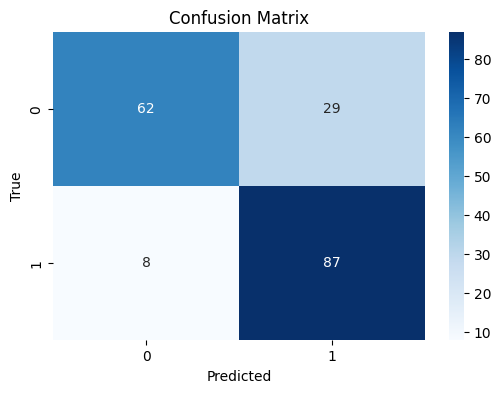

In [ ]:
from sklearn.metrics import confusion_matrix, classification_report
# Convert predicted probabilities to binary predictions
binary_predictions = (predictions > 0.5).astype(int)

# Confusion Matrix
cm = confusion_matrix(y_test, binary_predictions)
plt.figure(figsize=(6, 4))
sns.heatmap(cm, annot=True, fmt='d', cmap='Blues')
plt.xlabel('Predicted')
plt.ylabel('True')
plt.title('Confusion Matrix')
plt.show()

In [ ]:
# Classification Report
class_report = classification_report(y_test, binary_predictions)
print("\nClassification Report:")
print(class_report)


Classification Report:
              precision    recall  f1-score   support

           0       0.89      0.68      0.77        91
           1       0.75      0.92      0.82        95

    accuracy                           0.80       186
   macro avg       0.82      0.80      0.80       186
weighted avg       0.82      0.80      0.80       186

